___
# Pandas `DataFrame`  
*Двумерная структура данных представленная в виде таблицы*  

<img src='img/pdlogo.png'></img>  
# [Справочник Pandas](#https://pandas.pydata.org/docs/)
___
___

> # <h2  id='cont' style= 'color: violet'> Оглавление </h2>
- [Создание](#create)  
  - [Датафреймов](#df)
  - [Столбцов](#col)
- [Извлечение данных](#ind)
- [Информация о данных](#inf)
- [Пропущенные значения](#na)
- [Операции с данными](#oper)
  - [Агрегирующие методы](#agg)
  - [Группировка данных](#group)
  - [Формат времени datetime](#date)
  - [Тип categoty](#cat)
- [Фильтрация данных](#filter)
- [Сортировка данных](#sort)
- [Объединение датафреймов](#conc)
- [Визуализация данных](#plot)
- [Работа с файлами](#file)  

___

## <h2  id='create' style= 'color: violet'> Создание </h2>
___

- ## <h3  id='df' style= 'color: violet'> Создание датафрейма</h3>

___
Из <span style= 'color:red'>**СЛОВАРЕЙ**</span>  
pandas.DataFrame( `{ название столбца : [ элементы ] }` )

In [28]:
import pandas as pd

df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США'],
    'population': [56.29, 38.05, 256.33],
    'square': [133396, 9984670, 9826630]
})
print(df)


  country  population   square
0  Англия       56.29   133396
1  Канада       38.05  9984670
2     США      256.33  9826630


___
Из <span style= 'color:red'>**СПИСКОВ**</span>  
pandas.Series( `data=`[ [ *элементы по строкам* ] ], `columns=`[ *названия столбцов* ], `index=`[ *индексы* ])

In [29]:
df = pd.DataFrame(
    data = [
        ['Англия', 56.29, 133396],
        ['Канада', 38.05, 9984670],
        ['США', 322.28, 9826630],
            ],
    columns= ['country', 'population', 'square'],
    index = ['UK', 'CA', 'US']
)
print(df)


   country  population   square
UK  Англия       56.29   133396
CA  Канада       38.05  9984670
US     США      322.28  9826630


___
<span style= 'color:blue'>.index</span> - `Создание индексов` для элементов DataFrame

In [30]:

df.index = ['UK', 'CA', 'US']
print(df )


   country  population   square
UK  Англия       56.29   133396
CA  Канада       38.05  9984670
US     США      322.28  9826630


___
- ## <h3  id='col' style= 'color: violet'> Создание столбцов</h3>

___
<span style= 'color:blue'>[ ' name ' ] = </span> - `Создание столбцов` с названием **name**

In [31]:
df['density'] =  df['population'] / df['square']

df


,country,population,square,density
UK,Англия,56.29,133396,0.000422
CA,Канада,38.05,9984670,0.000004
US,США,322.28,9826630,0.000033


___
<span style= 'color:blue'>**.map**</span>( { _old_ : `_new_` } ) - Создание новых значений `_new_` для старых значений _old_

In [32]:
df['Size'] = df['square'].apply(lambda sq: 'Large' if sq > 3000000 else 'Small')
display(df.head(4))

df['Size_bin'] = df['Size'].map({'Large': 1, 'Small': 0})
display(df.head(4))


,country,population,square,density,Size
UK,Англия,56.29,133396,0.000422,Small
CA,Канада,38.05,9984670,0.000004,Large
US,США,322.28,9826630,0.000033,Large


,country,population,square,density,Size,Size_bin
UK,Англия,56.29,133396,0.000422,Small,0
CA,Канада,38.05,9984670,0.000004,Large,1
US,США,322.28,9826630,0.000033,Large,1


___
<span style= 'color:blue'>**.drop**( [ ' name '] , axis= 1, inplace= True) </span> - `Удаление столбцов` с названием **name**
- axis=1 - Удаление столбцов
- inplace=True - Удаление из текущего датафрейма
- index= - номер индекса, для удаления всей строки

In [33]:
print(df)
df.drop(['density'], axis=1, inplace=True)
print(df)
df.drop(index='UK', inplace=True, axis=0)
print(df)


   country  population   square   density   Size  Size_bin
UK  Англия       56.29   133396  0.000422  Small         0
CA  Канада       38.05  9984670  0.000004  Large         1
US     США      322.28  9826630  0.000033  Large         1
   country  population   square   Size  Size_bin
UK  Англия       56.29   133396  Small         0
CA  Канада       38.05  9984670  Large         1
US     США      322.28  9826630  Large         1
   country  population   square   Size  Size_bin
CA  Канада       38.05  9984670  Large         1
US     США      322.28  9826630  Large         1


___
## <h2  id='ind' style= 'color: violet'> Извлечение данных </h2>
___
___

Параметр <span style= 'color: orange'>**axis=`0`**</span> - движение по `столбцам`   
Параметр <span style= 'color: orange'>**axis=`1`**</span> - движение по `строкам`  
<img src='img/axis.png'><img>

In [34]:

print(df,'\n')
print('Среднее по столбцам: ','\n',df.mean(axis=0, numeric_only=True),'\n')
print('Среднее по строкам: ','\n',df.mean(axis=1, numeric_only=True),'\n')


   country  population   square   Size  Size_bin
CA  Канада       38.05  9984670  Large         1
US     США      322.28  9826630  Large         1 

Среднее по столбцам:  
 population        180.165
square        9905650.000
Size_bin            1.000
dtype: float64 

Среднее по строкам:  
 CA    3.328236e+06
US    3.275651e+06
dtype: float64 



___
<span style= 'color:blue'>.**имя столбца**</span> - `Возвращает столбец` по имени для элементов DataFrame  
<span style= 'color:blue'>**[ 'имя столбца' ]**</span> - `Возвращает столбец` по имени для элементов DataFrame

In [35]:
print(df.square, '\n')
print(df['country'])


CA    9984670
US    9826630
Name: square, dtype: int64 

CA    Канада
US       США
Name: country, dtype: object


___
<span style= 'color:blue'>**.loc**</span>[ [name_i,name_col] ] - Возвращает данные *`строки`* по назначенным индексам элементов name_i, name_col  
<span style= 'color:blue'>**.iloc**</span>[ [i1,i2] ] - Возвращает данные *`строки`* по порядковым индексам элементов i1, i2

In [36]:
print(df)
df.index = ['ca', 'us']
print(df)
print('_'*30)
print('Строку: ','\n',df.loc[['ca']])
print('_'*30)
print('Несколько строк: ','\n',df.loc[['ca','us'], 'square'])
print('_'*30)
print('Отдельное значение: ','\n',df.loc['ca', 'square'])


   country  population   square   Size  Size_bin
CA  Канада       38.05  9984670  Large         1
US     США      322.28  9826630  Large         1
   country  population   square   Size  Size_bin
ca  Канада       38.05  9984670  Large         1
us     США      322.28  9826630  Large         1
______________________________
Строку:  
    country  population   square   Size  Size_bin
ca  Канада       38.05  9984670  Large         1
______________________________
Несколько строк:  
 ca    9984670
us    9826630
Name: square, dtype: int64
______________________________
Отдельное значение:  
 9984670


___
<span style= 'color:blue'>**.head**</span> ( n ) - Возвращает n-количество *`первых строк`*   
<span style= 'color:blue'>**.tail**</span> ( n ) - Возвращает n-количество *`последних строк`*  
<span style= 'color:blue'>**.sample**</span> ( n ) - Возвращает *`случайное`* n-количество  строк


In [37]:
h = df.head(2)
t = df.tail(2)
s = df.sample(2)

display(h)
display(t)
display(s)


,country,population,square,Size,Size_bin
ca,Канада,38.05,9984670,Large,1
us,США,322.28,9826630,Large,1


,country,population,square,Size,Size_bin
ca,Канада,38.05,9984670,Large,1
us,США,322.28,9826630,Large,1


,country,population,square,Size,Size_bin
us,США,322.28,9826630,Large,1
ca,Канада,38.05,9984670,Large,1


___
<span style= 'color:blue'>**.set_axis**</span> ( [ `names` ], axis='index' ) - Задает названия `names` строкам (индексам)
- axis= 'columns' - Задает названия `names` столбцам

In [38]:
df1 = pd.DataFrame({'A':[1,2,3], 'B': [4,5,6]})
print(df1)
print('_'*40)

df1 = df1.set_axis(['x', 'y', 'z'], axis='index')
print(df1)
print('_'*40)

df1 = df1.set_axis(['I', 'II'], axis='columns')
print(df1)
print('_'*40)


   A  B
0  1  4
1  2  5
2  3  6
________________________________________
   A  B
x  1  4
y  2  5
z  3  6
________________________________________
   I  II
x  1   4
y  2   5
z  3   6
________________________________________


___
<span style= 'color:blue'>**.set_index**</span> ( [ `name` ] ) - Задает столбец-индекс 

In [39]:
df.set_index('country')


,population,square,Size,Size_bin
country,,,,
Канада,38.05,9984670,Large,1
США,322.28,9826630,Large,1


___
<span style= 'color:blue'>**.reset_index**</span> (  ) - Переназначает индексы
- drop=True : удаляет старые индексы
- inplace=True : меняет наместе

In [40]:
print(df)
df.reset_index(drop=True, inplace=True)


   country  population   square   Size  Size_bin
ca  Канада       38.05  9984670  Large         1
us     США      322.28  9826630  Large         1


___
<span style= 'color:blue'>**.rename**</span> (  ) - Меняет название столбцов
- `columns=` - Выбранным столбцам назначается новое имя

In [41]:
display(df.rename(columns={'country': 'COUNTRY'}).head(2))
display(df.rename(columns= lambda col: '-=' + col.lower() + '=-').head(2))


,COUNTRY,population,square,Size,Size_bin
0,Канада,38.05,9984670,Large,1
1,США,322.28,9826630,Large,1


,-=country=-,-=population=-,-=square=-,-=size=-,-=size_bin=-
0,Канада,38.05,9984670,Large,1
1,США,322.28,9826630,Large,1


## <h2  id='inf' style= 'color: violet'> Информация о данных </h2>
___

___
<span style= 'color:blue'>**.shape**</span> - Возвращает кортеж  с количеством *`строк и столбцов`*   

In [42]:
df.shape


(2, 5)

___
<span style= 'color:blue'>**.info**</span> - Возвращает детальную информацию о  *`столбцах`*   

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     2 non-null      object 
 1   population  2 non-null      float64
 2   square      2 non-null      int64  
 3   Size        2 non-null      object 
 4   Size_bin    2 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 208.0+ bytes


___
<span style= 'color:blue'>**.describe**</span> () - Возвращает *`статистические показатели`* для столбцов  
- `include=` название типа данных значений, для котороых нужна статистика

In [44]:
print(df.describe())
print(df.describe(include=['int64']))


       population        square  Size_bin
count     2.00000  2.000000e+00       2.0
mean    180.16500  9.905650e+06       1.0
std     200.98096  1.117512e+05       0.0
min      38.05000  9.826630e+06       1.0
25%     109.10750  9.866140e+06       1.0
50%     180.16500  9.905650e+06       1.0
75%     251.22250  9.945160e+06       1.0
max     322.28000  9.984670e+06       1.0
             square  Size_bin
count  2.000000e+00       2.0
mean   9.905650e+06       1.0
std    1.117512e+05       0.0
min    9.826630e+06       1.0
25%    9.866140e+06       1.0
50%    9.905650e+06       1.0
75%    9.945160e+06       1.0
max    9.984670e+06       1.0


___
df ['`имя столбца`']<span style= 'color:blue'>**.value_counts**</span> ( ) - Возвращает `частоту` для уникальных значений столбца 
- `normalize=`True - частота возвращается в долях

In [45]:
print(df['population'].value_counts())
print('Частоты в долях:')
print(df['square'].value_counts(normalize=True))


population
38.05     1
322.28    1
Name: count, dtype: int64
Частоты в долях:
square
9984670    0.5
9826630    0.5
Name: proportion, dtype: float64


___
## <h2  id='na' style= 'color: violet'> Пропущенные значения </h2>
___
___
<span style= 'color:blue'>**.isnull( ).sum( )**</span> - Возвращает количество `пропущенных значений` в столбцах

In [46]:
df1 = pd.read_csv('data/data_ufo.csv')
df1.isnull().sum()


City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

___
<span style= 'color:blue'>**.dropna**</span> ( inplace=True) -Удаляет строки с пропущенными значениями
- `how=`'all' / 'any' - удаляет строку в которой все пропущены / хотябы одно значение пропущено
- `subset=`name - список колонок в которых при обноружении NaN будет удаляться строка значений
- `thresh=` - минимальное количество заполненных значений, если меньше, то данные удаляются


In [47]:
df1.dropna(how='any', inplace=True)
df1.isnull().sum()


City               0
Colors Reported    0
Shape Reported     0
State              0
Time               0
dtype: int64

___
<span style= 'color:blue'>**.fillna**</span> ( ) -Заполняет строки с пропущенными значениями
- `inplace=`True - применяет преобразование наместе
- `method=`ffill - Заполняет предыдущим значением 

In [48]:
df1 = pd.read_csv('data/data_ufo.csv')
df1.fillna(method='backfill')


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,RED,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,RED,OTHER,NJ,6/30/1930 20:00
2,Holyoke,RED,OVAL,CO,2/15/1931 14:00
3,Abilene,RED,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,RED,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,RED,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,RED,DISK,IA,12/31/2000 23:00
18238,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


___
<span style= 'color:blue'>**.duplicated( )**</span> - Маска с дублирующими записями
- `subset=`список столбцов для поиска дубликатов  

<span style= 'color:blue'>**.duplicated( ).sum( )**</span> - Возвращает количество `дублирующих строк` в столбцах

In [49]:
df1.duplicated().sum()


109

## <h2  id='oper' style= 'color: violet'> Операции с данными </h2>
___
___

## <h3  id='agg' style= 'color: red'> Агрегирующие методы </h3> 
- <a style='color:blue'> **.count** </a>( ) - возвращает `количество непустых значений`
- <a style='color:blue'> **.mean** </a>( ) - возвращает `cреднее значение`
- <a style='color:blue'> **.median** </a>( ) - возвращает `медианное значение`
- <a style='color:blue'> **.min** </a>( ) - возвращает `минимальное значение`
- <a style='color:blue'> **.max** </a>( ) - возвращает `максимальноее значение`
- <a style='color:blue'> **.var** </a>( ) - возвращает `дисперсию`
- <a style='color:blue'> **.std** </a>( ) - возвращает `СКО`
- <a style='color:blue'> **.sum** </a>( ) - возвращает `сумму`
- <a style='color:blue'> **.quantile** </a>( **n** ) - возвращает `квантиль` уровня **n** (от 0 до 1)
- <a style='color:blue'> **.nunique** </a>( ) - возвращает `количество уникальных` значений
- <a style='color:blue'> **.mode** </a>( ) - возвращает `модальные` значений
- <a style='color:blue'> **.skew** </a>( ) - возвращает `коээфициент ассиметрии` значений ('+' скошены вправо)
- <a style='color:blue'> **.kurtosis** </a>( ) - возвращает `коээфициент эксцесса` значений ('+' скошены вверх)



In [50]:
square_mean = df['square'].mean()
quantile_3 = df['population'].quantile(0.75)
print(square_mean)
print(quantile_3)
display(df['population'].skew())
display(df['population'].kurtosis())

q_1 = df['population'].quantile(0.25)
q_4 = df['population'].quantile(0.75)
InterQuartileRange = q_4 - q_1
print(f'Выбросы слева < {q_1 - InterQuartileRange}')
print(f'Выбросы справа > {q_4 + InterQuartileRange}')


9905650.0
251.22249999999997


nan

nan

Выбросы слева < -33.00749999999999
Выбросы справа > 393.3375


- <a style='color:blue'> **.rolling** </a>( ).**func** - возвращает скользящее значение функции **func**
    - `window`: кол-во объектов в окне


In [51]:

df['rolling pop'] = df['population'].rolling(window=2).mean()
df


,country,population,square,Size,Size_bin,rolling pop
0,Канада,38.05,9984670,Large,1,NaN
1,США,322.28,9826630,Large,1,180.165


## <h3  id='group' style= 'color: red'> Группировка данных </h3>
___ 
<a style='color:blue'> **.groupby ( 'group col' ).** </a>[ **'aggr var'** ].**aggr method** ( ) - возвращает сгрупированные значения  
  столбца `group col` по значениям **'aggr var'**, помещенныим в метод **aggr method**()  
- `as_index=` False -  Создает индексы (вместо определения значений столбца group col индексами)  
- <a style='color:blue'>**.agg**</a> ( [ func names ] ) - Применяется список аггрегирующих функций  
- <a style='color:blue'>**.unstack**</a> (  ) - При наличии второго индекса, определяет второй индекс столбцами  

  
<img src='data/groupby.png'></img>

In [52]:
df1 = pd.read_csv('data/melb_data.csv')
print(df1.groupby('Regionname')['YearBuilt'].count()[:10])

display(df1.groupby('YearBuilt')['Price'].agg([ 'count', 'mean', 'max' ]).sort_values(by='mean', ascending=False))

df1.groupby(['Type', 'Rooms' ])['Price'].mean().unstack()


Regionname
Eastern Metropolitan          1471
Eastern Victoria                53
Northern Metropolitan         3890
Northern Victoria               41
South-Eastern Metropolitan     450
Southern Metropolitan         4695
Western Metropolitan          2948
Western Victoria                32
Name: YearBuilt, dtype: int64


,count,mean,max
YearBuilt,,,
1884.0,1,5.046000e+06,5046000.0
1863.0,3,4.125000e+06,7650000.0
1903.0,2,3.455000e+06,3900000.0
1893.0,1,3.335000e+06,3335000.0
1854.0,1,3.310000e+06,3310000.0
...,...,...,...
1968.0,32,7.645469e+05,1880000.0
1975.0,211,7.608938e+05,2640000.0
1872.0,1,6.900000e+05,690000.0


Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
h,866865.517241,1.017238e+06,1.109233e+06,1.462283e+06,1.877327e+06,1.869508e+06,1920700.0,1.510286e+06,900000.0
t,592704.545455,7.101585e+05,9.847087e+05,1.217092e+06,1.035000e+06,NaN,NaN,NaN,NaN
u,389928.923203,6.104905e+05,8.505963e+05,1.037476e+06,NaN,5.200000e+05,NaN,2.250000e+06,NaN


___
pandas<a style='color:red'> **.pivot_table** </a>( **df** ) - Группирует данные датафрейма **df**
- `values=` _name column_ - столбец, к которому будет применяться агрегирующая функция
- `index= `_name column_ - столбец, значения которого будут группироваться
- `aggfunc=` _func_ - агрегирующая функция
- `columns=` _name column_ - столбец, уникальные значения которго будут помещены как столбцы
- `fill_value=` -назначает значения пропущенным данным



In [53]:
df1.pivot_table( values='Price', aggfunc='mean', index=['Rooms' ], columns='Type').sort_values(by='h')


Type,h,t,u
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
10,9.000000e+05,NaN,NaN
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
8,1.510286e+06,NaN,2.250000e+06
6,1.869508e+06,NaN,5.200000e+05
5,1.877327e+06,1.035000e+06,NaN
7,1.920700e+06,NaN,NaN


> Функции  

df [ **' col name '**] <a style='color:blue'> **.apply** </a>( **func**) - Применяет функцию  **func** к каждому значению столбца  **' col name '**
- args=() - Кортеж дополнительных аргументов в функцию

In [54]:
df['population'] = df['population'].apply(lambda x: x*1000)
print(df)


  country  population   square   Size  Size_bin  rolling pop
0  Канада     38050.0  9984670  Large         1          NaN
1     США    322280.0  9826630  Large         1      180.165


df [ **' col name '**] <a> **.map** </a>( **dict / Series**) - Назначает значения из словаря или Series **dict / Series** каждому значению из столбца  **' col name '**

In [55]:
df['NEW COL'] = df['Size'].map( {'Large': 1000} )
df


,country,population,square,Size,Size_bin,rolling pop,NEW COL
0,Канада,38050.0,9984670,Large,1,NaN,1000
1,США,322280.0,9826630,Large,1,180.165,1000


df [ **' col name '**] <a> **.replace** </a>( **dict / Series**) - Заменяет значения из словаря или Series **dict / Series** каждому значению из столбца  **' col name '**

In [56]:
df['Brand new col'] = df['country'].replace({'Канада': 'Canada', 'США': 'Unite SA'})
df


,country,population,square,Size,Size_bin,rolling pop,NEW COL,Brand new col
0,Канада,38050.0,9984670,Large,1,NaN,1000,Canada
1,США,322280.0,9826630,Large,1,180.165,1000,Unite SA


___
<h2  id='types' style= 'color: violet'> Типы данных </h2>

___
___


df ['`имя столбца`']<span style= 'color:blue'>**.astype**</span> ( '`тип данных`' ) - Преобразует данные столбца '`имя столбца`' в назначенный '`тип данных`' 

In [57]:
print(df['square'])
df['square'].astype('float64')


0    9984670
1    9826630
Name: square, dtype: int64


0    9984670.0
1    9826630.0
Name: square, dtype: float64

___
## <h3  id='date' style= 'color: violet'> Формат времени `datetime` </h3>
___


> Преобразование в datetime

pandas<a style='color:red'> **.to_datetime** </a>(df['`date name`'], dayfirst=True ) - Превращает столбец `date name` в datetime

In [58]:

df['Date'] = ['04/05/1881', '01/03/1889']
print(df)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


  country  population   square   Size  Size_bin  rolling pop  NEW COL  \
0  Канада     38050.0  9984670  Large         1          NaN     1000   
1     США    322280.0  9826630  Large         1      180.165     1000   

  Brand new col        Date  
0        Canada  04/05/1881  
1      Unite SA  01/03/1889  


> Доступ к атрибутам  

df [ 'col name' ].<a style='color:red'> **.dt.** </a>**atribute**  - Возвращает атрибут **atribute** из datetime  
<img src='img/datetime.png'></img>

In [59]:
year = df['Date'].dt.year
print(year)
day_of_week = df['Date'].dt.dayofweek
print(day_of_week)


0    1881
1    1889
Name: Date, dtype: int32
0    2
1    4
Name: Date, dtype: int32


___
## <h3  id='cat' style= 'color: violet'> Тип `category` </h3>  
_Тип данных для категориальных признаков, уменьшает использование памяти_

___

In [60]:
df['country'] = df['country'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        2 non-null      category      
 1   population     2 non-null      float64       
 2   square         2 non-null      int64         
 3   Size           2 non-null      object        
 4   Size_bin       2 non-null      int64         
 5   rolling pop    1 non-null      float64       
 6   NEW COL        2 non-null      int64         
 7   Brand new col  2 non-null      object        
 8   Date           2 non-null      datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 382.0+ bytes


> Доступ к атрибутам  

df [ 'col name' ].<a style='color:red'> **.cat.** </a>**atribute**  - Возвращает атрибут **atribute** из datetime  
- categories - возвращает список уникальных категорий
- codes - Возвращает числовое отображение имен категорий
- rename_categories() - переименовывает старые категории на новые
- add_categories() - добавляет новые категории, ранее не объявленные 

In [61]:
print(df['country'].cat.categories)
print(df['country'].cat.codes)


Index(['Канада', 'США'], dtype='object')
0    0
1    1
dtype: int8



___
## <h2  id='filter' style= 'color: violet'> Фильтрация данных </h2>
___
___

In [62]:
df[(df['population'] > 100) & (df['square'] > 10000000) ]['country']


Series([], Name: country, dtype: category
Categories (2, object): ['Канада', 'США'])

___
<span style= 'color:blue'>**.isin**</span> ( _list_ ) - Выбирает данные, которые присутствуют в списке _list_

In [63]:
lst = ['Канада']
df[ df['country'].isin(lst)]


,country,population,square,Size,Size_bin,rolling pop,NEW COL,Brand new col,Date
0,Канада,38050.0,9984670,Large,1,NaN,1000,Canada,1881-05-04


___
## <h2  id='sort' style= 'color: violet'> Сортировка данных </h2>
___
___

<span style= 'color:blue'>**.sort_values**</span> (  ) - Сортирует данные датафрейма
- `by=` - список `имен столбцов` по которым сортировка 
- `axis=` - 0 - сортировка по строкам, 1 - по столбцам
- `ascending=`True - сортировка по возрастанию
- `ignore_index=`True - изменять ли индексы при сортировке
- `inplace=`True - заменить исходный датафрейм на отсортированный
- `kind=` выбор метода сортировки (‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’)

In [64]:
df = pd.read_csv('data/countries.csv', sep=';')
df.sort_values(by='population', ignore_index=True)


,country,population,square
0,Беларусь,9.50,207600
1,Казахстан,17.04,2724902
2,Канада,38.05,9984670
3,Украина,45.50,603628
4,Англия,56.29,133396
5,Россия,146.24,17125191
6,США,322.28,9826630


___
<span style= 'color:blue'>**.sort_index**</span> (  ) - Сортирует `индексы` датафрейма
- `axis=`1 - сортирует столбцы

In [65]:
df = df[['square', 'country', 'population' ]]
display(df.head(2))

df.sort_index(axis=1).head(2)


,square,country,population
0,133396,Англия,56.29
1,9984670,Канада,38.05


,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670


___
## <h2  id='conc' style= 'color: violet'> Объединение датафреймов </h2>
___
___

pandas<a style='color:red'> **.concat** </a> ( (df1, df2) ) - Объединение датафреймов df1 и df2 в один
- `ignore_index=` True - Назначает новые индексы
- `axis=` - 1 добавить к строкам, 0 - к столбцам

In [66]:
df1 = pd.DataFrame(
    data = [
        ['Англия', 56.29, 133396],
        ['Канада', 38.05, 9984670],
        ['США', 322.28, 9826630],
            ],
    columns= ['country', 'population', 'square'],
    index = ['UK', 'CA', 'US']
)
df2 = pd.DataFrame(
    data = [
        ['Россия', 56.29, 133396],
        ['Беларусь', 38.05, 9984670],
        ['Украина', 322.28, 9826630],
            ],
    columns= ['country', 'population', 'square'],
    index = ['RU', 'BE', 'UK']
)

df_concated = pd.concat((df1, df2))
display(df_concated)


,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,56.29,133396
BE,Беларусь,38.05,9984670
UK,Украина,322.28,9826630


___
<a style='color:blue'> **.join** </a> (  ) - Объединение датафреймов
- `other=` - Название датафрейма, который объединяем с исходным
- `on= `- Название столбца, который содержит ключи
- ` how=` - Способ объединения ('inner', 'left', 'right', 'outer')
- `lsuffix` - Суффикс к столбцам левой таблицы, названия которых совпадают
- `rsuffix` - Суффикс к столбцам правой таблицы, названия которых совпадают
- _other_df_`.set_index` ( _col name_ )  - назначает столбец _col name_ индексом датафрейма, который объединяется с исходным  
<img src='data/join_s.png' width=800></img>


In [67]:
countries = list(df_concated['country'])
df_to_join = pd.DataFrame({'country': countries, 'joined_data': [1,2,3,4,5,6]})
display(df_to_join, df_concated)
df_concated.join(df_to_join.set_index('country'), on='country')


,country,joined_data
0,Англия,1
1,Канада,2
2,США,3
3,Россия,4
4,Беларусь,5
5,Украина,6


,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,56.29,133396
BE,Беларусь,38.05,9984670
UK,Украина,322.28,9826630


,country,population,square,joined_data
UK,Англия,56.29,133396,1
CA,Канада,38.05,9984670,2
US,США,322.28,9826630,3
RU,Россия,56.29,133396,4
BE,Беларусь,38.05,9984670,5
UK,Украина,322.28,9826630,6


___
<a style='color:blue'> **.merge** </a> (  ) - Объединение датафреймов
- `on= `- Название столбца, который содержит ключи  
- ` how=` - Способ объединения ('inner', 'left', 'right','outer')
- `left_index=` True - Для объединения обоих датафремов по индексу
- `right_index=` True - Для объединения обоих датафремов по индексу



In [68]:
countries = list(df_concated['country'])
df_to_join = pd.DataFrame({'country': countries, 'joined_data': [1,2,3,4,5,6]})
display(df_to_join, df_concated)

df_concated.merge(df_to_join, on='country', how='left')


,country,joined_data
0,Англия,1
1,Канада,2
2,США,3
3,Россия,4
4,Беларусь,5
5,Украина,6


,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,56.29,133396
BE,Беларусь,38.05,9984670
UK,Украина,322.28,9826630


,country,population,square,joined_data
0,Англия,56.29,133396,1
1,Канада,38.05,9984670,2
2,США,322.28,9826630,3
3,Россия,56.29,133396,4
4,Беларусь,38.05,9984670,5
5,Украина,322.28,9826630,6


___
<a style='color:blue'> **.drop_duplicates** </a> (  ) - Удаление дублирующих строк датафрейма 

In [69]:
df.drop_duplicates()


,square,country,population
0,133396,Англия,56.29
1,9984670,Канада,38.05
2,9826630,США,322.28
3,17125191,Россия,146.24
4,603628,Украина,45.50
5,207600,Беларусь,9.50
6,2724902,Казахстан,17.04


___
## <h2  id='plot' style= 'color: violet'> Визуализация данных </h2>
___
___


<a style='color:blue'> **.plot** </a> (  ) - Построение графиков
* x - название признака, который будет отложен по оси абсцисс
* y - название признака, который будет отложен по оси ординат
* figsize - размер графика (кортеж из ширины и высоты в дюймах)
* **kind** - тип визуализации. Основные типы:
    * 'line' - линейный график (стоит по умолчанию)
    * 'bar' - столбчатая диаграмма
    * 'barh' - горизонтальная столбчатая диаграмма
    * 'hist' - гистограмма
    * 'box' - коробчатая диаграмма (boxplot)
    * 'pie' - круговая диаграмма
    * 'scatter' - диаграмма рассеяния
* colormap - тип цветовой схемы
* grid - отображение сетки (по умолчанию False)
* legend - отображение легенды (по умолчанию False)
* title - название графика
* color - цвет

,square,country,population
0,133396,Англия,56.29
1,9984670,Канада,38.05
2,9826630,США,322.28
3,17125191,Россия,146.24
4,603628,Украина,45.50
5,207600,Беларусь,9.50
6,2724902,Казахстан,17.04


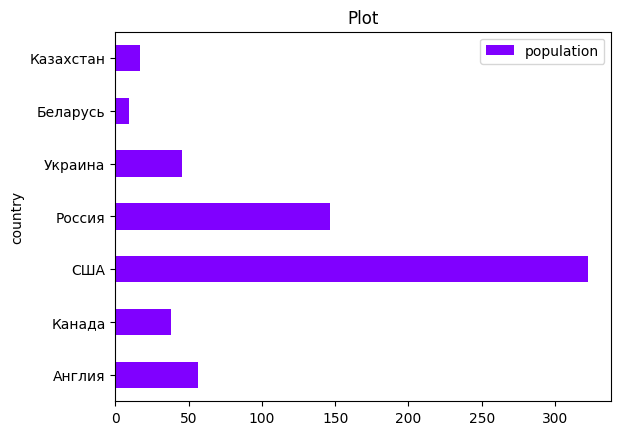

In [70]:
df.plot(x='country', y=['population'], kind='barh', colormap='rainbow', title='Plot')
df


## <h2  id='file' style= 'color: violet'> Работа с файлами </h2>
___
___

> <a style='color:red'> **CSV** </a>  
___

___
<a style='color:blue'> **.to_csv** </a> ( **`path_or_buf=`**'* path* ', **`sep=`**' *,* ' , **`decimal=`**' *.* ', **`columns=`**[ *c1,c2,c3* ], **`index=`** *True* ) - **Запись данных** DataFrame в файл-CSV
- **`path_or_buf=`** - назначает путь к файлу
- **`index_col=`** - назначает колонку в качестве индексов
- **`sep=`** - назанчает разделить данных в выходном файле csv
- **`decimal=`** - назначает разделитель дробной части
- **`columns=`** - определяет список столбцов, внесенных в файл
- **`index=`** - назаначает индексы строкам
- **`compresson=`** - архивирует файл

In [71]:
import pandas as pd

countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'square': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})

countries_df.to_csv('data/countries.csv', index=False, sep=';')

compression_params = dict(method='zip', archive_name='countries.csv')
countries_df.to_csv('data/countries.zip', index=False, sep=';', compression=compression_params)


___
<a style='color:blue'> **.read_csv** </a> ( **`filepath_or_buffer=`**'* path* ', **`sep=`**' *,* ', **`skiprows=`** *number*) - **Чтение данных** файл-CSV в DataFrame  
- **`filepath_or_buffer=`** - путь или ссылка к файлу
- **`sep=`** - назанчает разделить данных во входном файле csv
- **`skiprows=`** - назначает количество `первых строк` для игнорирования при чтении
- **`usecols=`** - назначает названия столбцов для загрузки
- **`index_col=`** - назначает столбец-индекс
- **`dtype=`** - назначает типы данных для указанных столбцов {'col':type}




In [72]:
df = pd.read_csv('data/countries.csv', sep=';', dtype={'square':float})
print(df)


     country  population      square
0     Англия       56.29    133396.0
1     Канада       38.05   9984670.0
2        США      322.28   9826630.0
3     Россия      146.24  17125191.0
4    Украина       45.50    603628.0
5   Беларусь        9.50    207600.0
6  Казахстан       17.04   2724902.0


___
> <a style='color:red'> **EXCEL** </a>  
___

___
<a style='color:blue'> **.to_excel** </a> ( **`excel_writer=`**'* path* ', **`columns=`**[ *c1,c2,c3* ], **`index=`** *True* , **`engine=`**'openpyxl') - **Запись данных** DataFrame в файл-excel
- **`excel_writer=`** - назначает путь к файлу или выбирает существующий excel-файл
- **`columns=`** - определяет список столбцов, внесенных в файл
- **`index=`** - назаначает индексы строкам
- **`engine=`** - назначает движок для чтения файлов excel, если не установлен, то установить (через `pip install openpyxl`)
- **`sheet_name=`** - назаначает название листу


In [73]:
countries_df.to_excel('data/df_to_excel.xlsx',engine='openpyxl', sheet_name='second', columns=['country', 'square'])


___
<a style='color:blue'> **.read_excel** </a> ( **`io=`**'* path* ', **`names=`**[ *c1,c2,c3* ], **`nrows=`** *number* , **`engine=`**'openpyxl') - **Чтение данных** из файла-excel в DataFrame
- **`io=`** - назначает путь к файлу
- **`names=`** - определяет список столбцов для чтения из файла
- **`nrows=`** - назаначает количество строк для чтения из файла
- **`engine=`** - назначает движок для чтения файлов excel, если не установлен, то установить (через `pip install openpyxl`)
- **`sheet_name=`** - выбирает название листа для чтения
- **`na_values=`** - назначаются значения, которые будут считаться пропусками


In [74]:
df = pd.read_excel('data/df_to_excel.xlsx')
print(df)


   Unnamed: 0    country    square
0           0     Англия    133396
1           1     Канада   9984670
2           2        США   9826630
3           3     Россия  17125191
4           4    Украина    603628
5           5   Беларусь    207600
6           6  Казахстан   2724902


___
> <a style='color:red'> **JSON** </a>  
___

___
<a style='color:blue'> **.to_json** </a> ( **`path_or_buf=`**'* путь*) - **Запись данных** DataFrame в файл-json
- **`path_or_buf=`** - назначает путь к файлу 


In [75]:
countries_df.to_json('data/df_to_json.js' )


___
<a style='color:blue'> **.read_json** </a> ( **`path_or_buf=`**'* путь* ', **`nrows=`** *number*) - **Чтение данных** json  в DataFrame
- **`path_or_buf=`** - путь или ссылка к файлу
- **`nrows=`** - назначает количество `первых строк` для чтения

In [76]:
df = pd.read_json('data/df_to_json.js')
print(df)


     country  population    square
0     Англия       56.29    133396
1     Канада       38.05   9984670
2        США      322.28   9826630
3     Россия      146.24  17125191
4    Украина       45.50    603628
5   Беларусь        9.50    207600
6  Казахстан       17.04   2724902


In [78]:
df.corr(numeric_only=True).round()

,population,square
population,1.0,1.0
square,1.0,1.0


___
# [Оглавление](#cont)